<a id='1.2'></a>
## 1. Loading the Data

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

from __future__ import print_function

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) 

#packages for numerical analysis 
# Import standard packages
# import sns package function and heatmap of correlation
import seaborn as sns
from sklearn.linear_model import LinearRegression
# The Python Code using Statsmodels
from pandas import DataFrame
import statsmodels.api as sm

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree

#Create an SVR model now and train it.
from sklearn.svm import SVR
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Select Symbol 
MyTicker = yf.Ticker("EQIX")

In [ ]:
for x in MyTicker.info:
    print (x,MyTicker.info[x])

zip 94065
sector Real Estate
fullTimeEmployees 10801
longBusinessSummary Equinix (Nasdaq: EQIX) is the world's digital infrastructure company, enabling digital leaders to harness a trusted platform to bring together and interconnect the foundational infrastructure that powers their success. Equinix enables today's businesses to access all the right places, partners and possibilities they need to accelerate advantage. With Equinix, they can scale with agility, speed the launch of digital services, deliver world-class experiences and multiply their value.
city Redwood City
phone 650-598-6000
state CA
country United States
companyOfficers []
website https://www.equinix.com
maxAge 1
address1 One Lagoon Drive
industry REIT—Specialty
ebitdaMargins 0.42414
profitMargins 0.0654
grossMargins 0.48145
operatingCashflow 2341249024
revenueGrowth 0.112
operatingMargins 0.17733999
ebitda 2775002880
targetLowPrice 732
recommendationKey buy
grossProfits 2888768000
freeCashflow 2348613632
targetMedianPr

In [ ]:
# Get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  5387.000000  5387.000000  5387.000000  5387.000000  5.387000e+03   
mean    202.126098   204.729720   199.194765   202.008250  5.755974e+05   
std     217.059219   219.233043   214.568345   217.016127  7.061581e+05   
min       2.360743     2.417142     1.611428     2.336571  9.030000e+02   
25%      45.216667    46.662924    43.726102    45.248901  2.352500e+05   
50%      85.083395    86.565934    83.085231    84.535515  4.717000e+05   
75%     331.586724   335.057823   327.335758   331.218475  7.541500e+05   
max     877.551862   882.075548   870.945767   879.654297  3.057420e+07   

         Dividends  Stock Splits  
count  5387.000000   5387.000000  
mean      0.015103      0.000006  
std       0.244472      0.000426  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max      10.950000      0.031250  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2000-08-11,328.731393,360.959961,309.394252,338.399963,792528,0.0,0.0,2000-08-11
2000-08-14,337.594254,338.399968,309.394257,309.394257,80228,0.0,0.0,2000-08-14
2000-08-15,313.422749,319.062747,309.394179,312.617035,48422,0.0,0.0,2000-08-15
2000-08-16,311.005604,336.788452,311.005604,319.062744,42166,0.0,0.0,2000-08-16
2000-08-17,315.839970,322.285684,307.782828,309.394257,47247,0.0,0.0,2000-08-17


<a id='2'></a>
# 2. Exploratory Data Analysis

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

# Plot
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume",xaxis_title="Date", yaxis_title="Volume")
fig.show()



In [ ]:
serie = data['Close']

In [ ]:
# check informtion of data, (Explain)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5387 entries, 2000-08-11 to 2022-01-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5387 non-null   datetime64[ns]
 1   Close   5387 non-null   float64       
 2   Open    5387 non-null   float64       
 3   High    5387 non-null   float64       
 4   Low     5387 non-null   float64       
 5   Volume  5387 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 294.6 KB


In [ ]:
#Statistical description of data and provide a simple summary about the data sample
serie.describe()


count    5387.000000
mean      202.008250
std       217.016127
min         2.336571
25%        45.248901
50%        84.535515
75%       331.218475
max       879.654297
Name: Close, dtype: float64

In [ ]:
#Splitting initialisation
def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [ ]:
# Split data to (30%-70%). 
train, test = Split_Train_Test(serie, 0.3)

In [ ]:
## Creat 5 lag variables

#Train
X_train=pd.concat([train.shift(1)], axis=1).dropna()
X_train=pd.concat([train.shift(1),train.shift(2),train.shift(3),train.shift(4),train.shift(5)], axis=1).dropna()

Y_train = train
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
X_train.columns= {'lag1', 'lag2', 'lag3', 'lag4', 'lag5'}

#Test
X_test=pd.concat([test.shift(1)], axis=1).dropna()
X_test=pd.concat([test.shift(1),test.shift(2),test.shift(3),test.shift(4),test.shift(5)], axis=1).dropna()

Y_test = test
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
X_test.columns= {'lag1', 'lag2', 'lag3', 'lag4', 'lag5'}



In [ ]:
# Check test and Train data
Y_test.head(5)

Date
2015-08-26    222.737213
2015-08-27    227.297913
2015-08-28    229.552643
2015-08-31    230.398056
2015-09-01    224.505173
Name: Close, dtype: float64

          lag1      lag5      lag4      lag3      lag2
lag1  1.000000  0.998526  0.996530  0.994621  0.992625
lag5  0.998526  1.000000  0.998503  0.996516  0.994609
lag4  0.996530  0.998503  1.000000  0.998512  0.996537
lag3  0.994621  0.996516  0.998512  1.000000  0.998521
lag2  0.992625  0.994609  0.996537  0.998521  1.000000


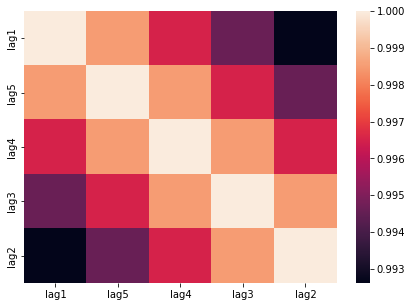

In [ ]:
# Estimate the correlation between independent variables. Plot heatmap  
corr = X_train.corr()
print (corr)
sns.heatmap(corr)

In [ ]:
#Data cleansing and exploratory analysis
#The second step is to check for nulls in the data with
# using isnull() function
X_train.isnull().sum() 

lag1    0
lag5    0
lag4    0
lag3    0
lag2    0
dtype: int64

#3. Linear Regression in Python using Statsmodels

In [ ]:
## Linear Regression in Python using Statsmodels
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(Y_train, X_train).fit()
X_test = sm.add_constant(X_test) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.622e+05
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:48:49   Log-Likelihood:                -9596.9
No. Observations:                3752   AIC:                         1.921e+04
Df Residuals:                    3746   BIC:                         1.924e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2410      0.085      2.833      0.0

In [ ]:
# Predict price of test set
pred_linear = model.predict(X_test) 

pred_linear.tail(5)


Date
2022-01-03    843.362663
2022-01-04    832.154560
2022-01-05    809.170223
2022-01-06    783.186323
2022-01-07    770.448587
dtype: float64

In [ ]:
#Comparing quickly 
Y_test.tail(5)

Date
2022-01-03    836.109985
2022-01-04    814.630005
2022-01-05    789.099976
2022-01-06    775.080017
2022-01-07    774.940002
Name: Close, dtype: float64

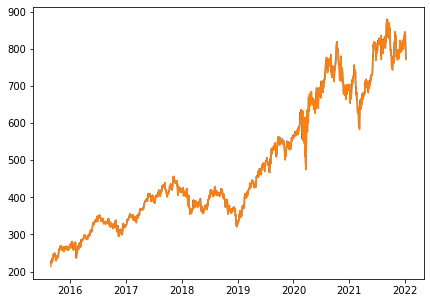

In [ ]:
# Plot predicted and actual price.
plt.rcParams['figure.figsize'] = (7, 5) 
plt.plot(Y_test)
plt.plot(pred_linear)


# Real: blue, Predict: Orange

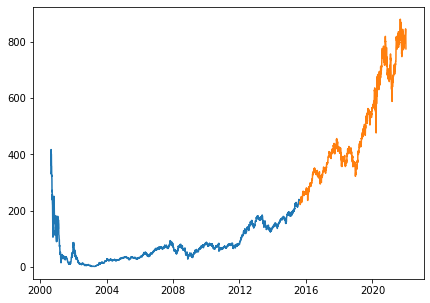

In [ ]:
plt.plot(Y_train)
plt.plot (Y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



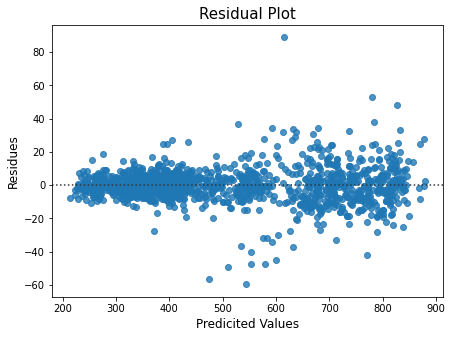

In [ ]:

# Plot Residual

sns.residplot(pred_linear,(pred_linear-Y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()


Conclusion: Good model here

# 4. Tree Regression Model

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2, random_state=1234)
regr_1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, random_state=1234)

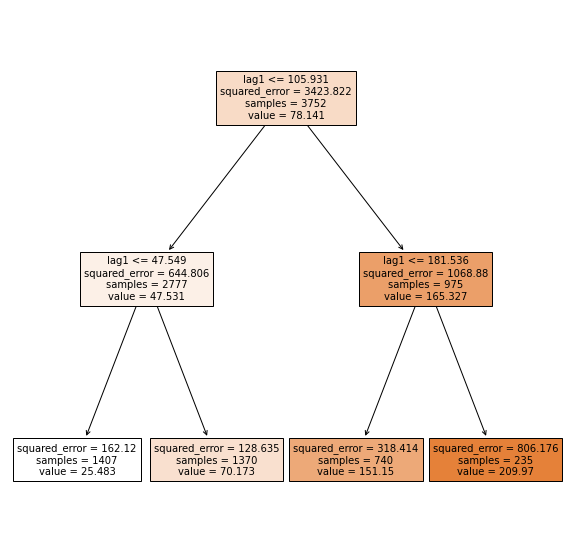

In [ ]:
names=['lag1', 'lag2', 'lag3', 'lag4', 'lag5']
names=X_train.columns
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(regr_1, filled=True)
_ = tree.plot_tree(regr_1, feature_names=names, filled=True)



In [ ]:
# Fit regression model with the best parameter
regr_1= DecisionTreeRegressor(max_depth=9,max_features='auto',max_leaf_nodes=10,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='best', random_state=1234)

regr_1.fit(X_train,Y_train)



DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=10,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1,
                      random_state=1234)

In [ ]:
# Use tree model to predict the price and check the value
Predic_Tree_1 = pd.DataFrame(regr_1.predict(X_test))
Predic_Tree_1.head(5)

,0
0,195.965293
1,195.965293
2,195.965293
3,195.965293
4,195.965293


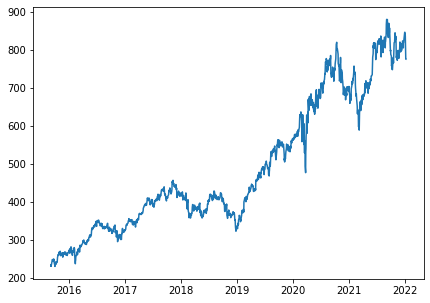

In [ ]:
# Plot predicted and actual price 
plt.rcParams['figure.figsize'] = (7, 5) 
plt.plot(Y_test)


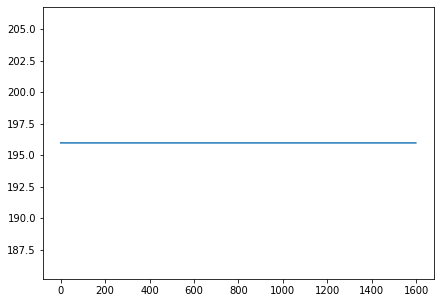

In [ ]:
plt.plot(Predic_Tree_1)

In [ ]:
# Calculate the accuracy of tree model
import sklearn.metrics as skm 
#MSE/RMSE
mse=skm.mean_squared_error(Y_test, Predic_Tree_1)
rmse=mse**0.5
print('MSE= %.3f, RMSE= %.3f'%(mse,rmse))

#R-Square
r2=skm.r2_score(Y_test, Predic_Tree_1)
print('R2 = %.3f'%(r2))

MSE= 117736.597, RMSE= 343.128
R2 = -2.785


Conclusion: Bad predictions

# 5. Support Vector Regression 


In [ ]:
#Create SVR model and train it
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1) 
svr_rbf.fit(X_train,Y_train)



SVR(C=1000.0, gamma=0.1)

In [ ]:
# Predicting a new result
y_predsvr_rbf = svr_rbf.predict(X_test)
y_4 = pd.DataFrame(y_predsvr_rbf)
y_4.head()

,0
0,134.926777
1,133.027903
2,128.264854
3,118.881311
4,118.880706


In [ ]:
#plt.plot(Y_test)
df = pd.DataFrame({'Real Values':Y_test,'Predicted Values':y_predsvr_rbf})
df1 = pd.DataFrame(Y_test)
df2 = pd.DataFrame(y_predsvr_rbf)

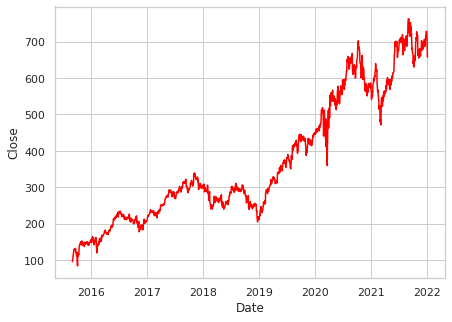

In [ ]:
# Plot residuals
sns.set_theme(style="whitegrid")
resi1 = (Y_test - y_predsvr_rbf)
sns.lineplot(data=resi1,color='red')


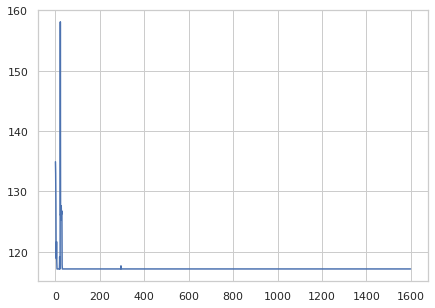

In [ ]:
plt.plot (y_4)

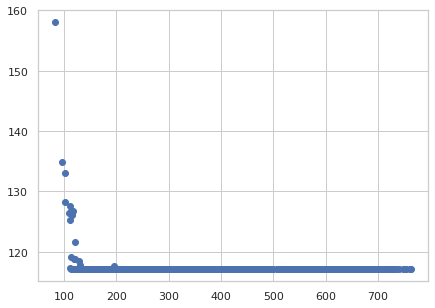

In [ ]:
plt.scatter(resi1,y_predsvr_rbf)

In [ ]:
# Calculate the accuracy of SVR model
#MSE/RMSE
import sklearn.metrics as skm
mse=skm.mean_squared_error(Y_test, y_predsvr_rbf)
rmse=mse**0.5
print('MSE= %.3f, RMSE= %.3f'%(mse,rmse))

#R-Square
r2=skm.r2_score(Y_test, y_predsvr_rbf)
print('R2 = %.3f'%(r2))


MSE= 170308.000, RMSE= 412.684
R2 = -4.475


Conclusion: Bad results

#6. Random forest model



In [ ]:
# Random forest model for regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X_train.columns

Num Features: 1
Selected Features: [False  True False False False False]
Feature Ranking: [6 1 2 3 5 4]


Index(['const', 'lag1', 'lag5', 'lag4', 'lag3', 'lag2'], dtype='object')

In [ ]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 lag1
2 lag5
3 lag4
4 lag2
5 lag3
6 const


In [ ]:
#Setting up a function to look for our well-fitted parameters

from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state=42)
#Train across 5 folds 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                       scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
#It'll sort us the best parameters 

grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=10) #Using the parameters we found
rfe2 = RFE(regressor, n_features_to_select=6)
fit2 = rfe.fit((X_train), (Y_train))
from operator import itemgetter
features2 = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 lag1
2 lag5
3 lag4
4 lag2
5 lag3
6 const


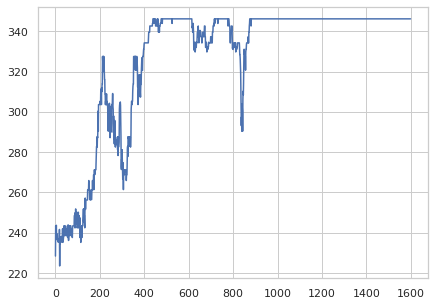

In [ ]:
rfe2.fit(X_train, Y_train)
predictions2 = rfe2.predict(X_test)
plt.plot(predictions2)

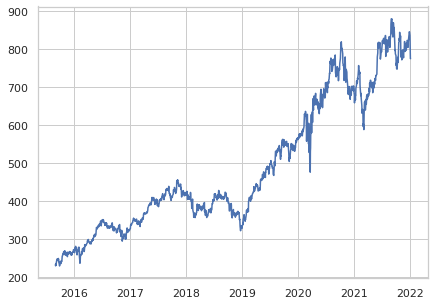

In [ ]:
plt.plot(Y_test)

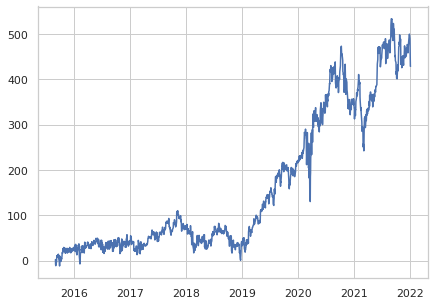

In [ ]:
#PLotting residuals

plt.plot(Y_test - predictions2)


Conclusion: Decent results. Good results for the first 3 years then our model looses its accuracy. Still a relevant model.